# Heart disease prediction using Machine Learning

* 1- Problem Definition:
with a clinical parameters about a patient, can i predict heart disease or not?

* 2- Data:
  I'm going to use this dataset : https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset
  <br>U may notice that i put two datasets in the folder.they are the same,the difference is that one of them is numerical and the other has a text data

In [2]:
! python -m pip install seaborn

In [3]:
# importing tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import recall_score,f1_score,precision_score
from sklearn.metrics import RocCurveDisplay

# 1- Getting the Data

In [4]:
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


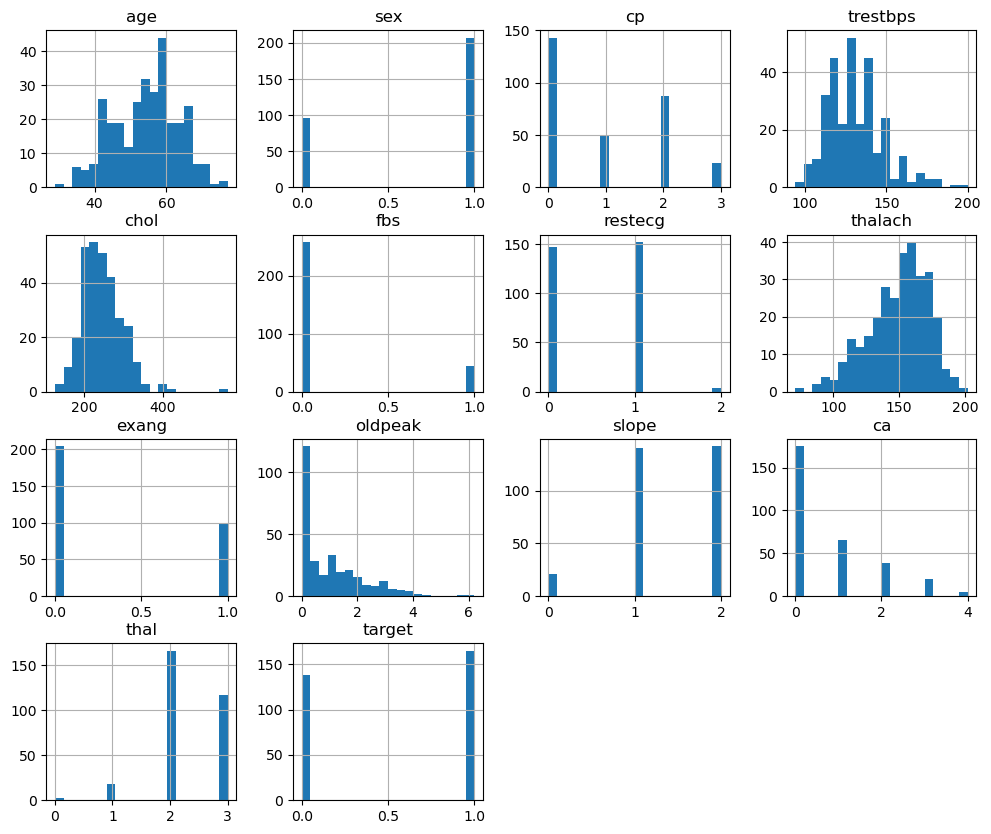

In [53]:
#plotting our data
heart_disease.hist(bins=20,figsize=(12,10))
plt.savefig("Dataset Data.png")
plt.show()


In [6]:
heart_disease.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

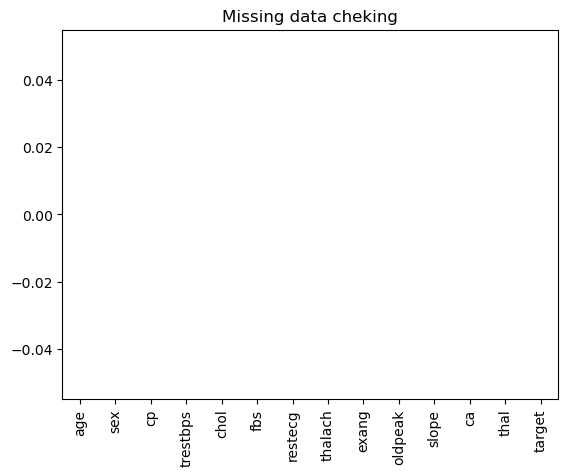

In [89]:
heart_disease.isna().sum().plot.bar()
plt.title("Missing data cheking")
plt.savefig("cheking messing data")


* I don't Have missing data 

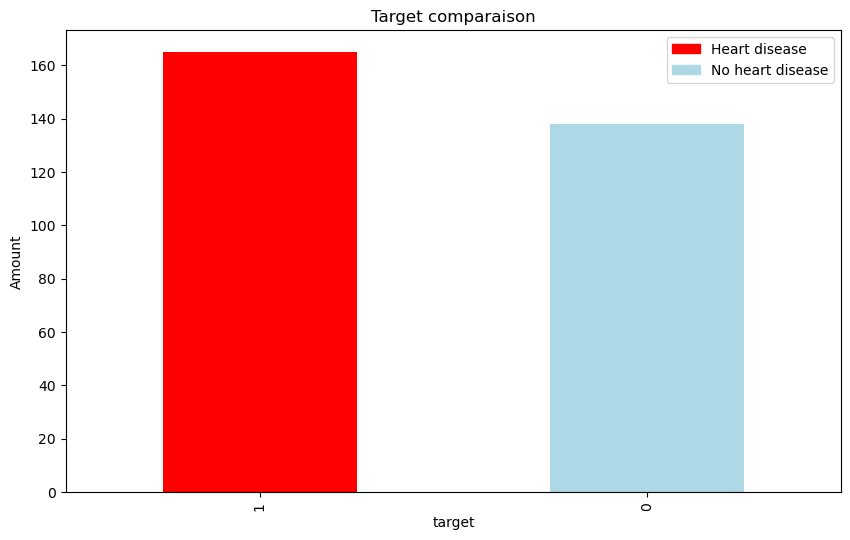

In [74]:
ax=heart_disease["target"].value_counts().plot.bar(color=["red","lightblue"],figsize=(10,6))
plt.ylabel("Amount")
plt.title("Target comparaison")
handles = [plt.Rectangle((0,0),1,1, color="red"), plt.Rectangle((0,0),1,1, color="lightblue")]
ax.legend(handles, ['Heart disease', 'No heart disease'], loc='upper right')
plt.savefig("Target_Comparing")

* 1= the target has a heart disease.
  <br>0= the target has not a heart disease

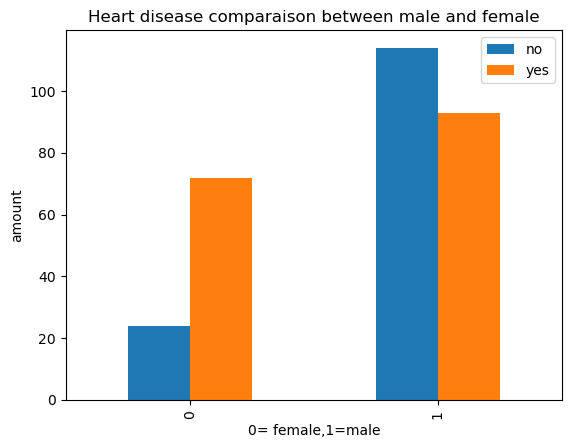

In [75]:
# compare target column with sex column
# male is presented by 1,Female is presented by 0
pd.crosstab(heart_disease["sex"],heart_disease["target"]).plot.bar()
plt.title("Heart disease comparaison between male and female")
plt.xlabel("0= female,1=male")
plt.ylabel("amount")
plt.legend(["no","yes"])
plt.savefig("Heart disease effect(Male and Female)")

In [10]:
pd.crosstab(heart_disease["cp"],heart_disease["target"])
# we have 4 types of chest pain :
  # 0 = typical angina
  # 1 = atypical angina 
  # 2 = non — anginal pain 
  #  3 = asymptotic

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


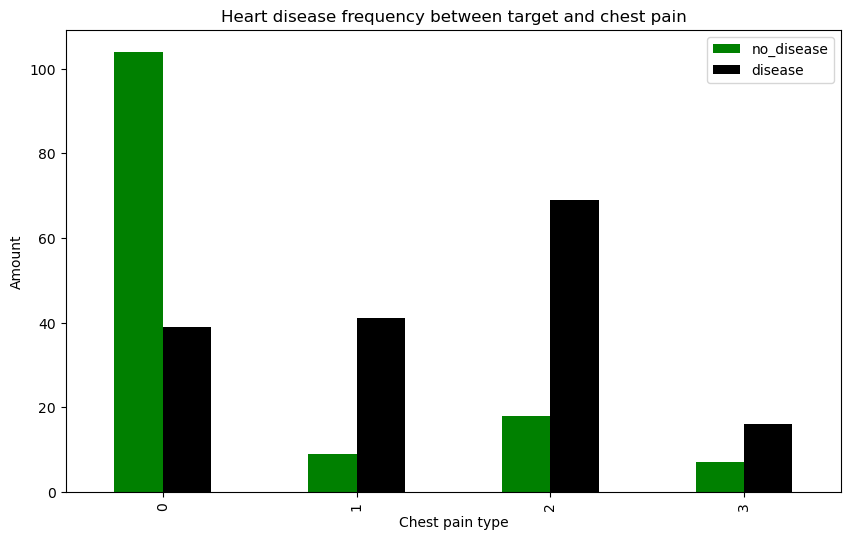

In [76]:
# comparing chest pain with the target
pd.crosstab(heart_disease["cp"],heart_disease["target"]).plot.bar(figsize=(10,6),color=["green","black"])
plt.title("Heart disease frequency between target and chest pain")
plt.xlabel("Chest pain type")
plt.ylabel("Amount")
plt.legend(["no_disease","disease"])
plt.savefig("Frequency (Target and CP)")


# 2- Modelling

In [12]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [13]:
# Splitting the data
X=heart_disease.drop("target",axis=1)
Y=heart_disease["target"]

In [14]:
# train and test sets
np.random.seed(42)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)


In [15]:
# choosing the models
# I'm going to try 3 models: (Logistic Regression),(K-Neighbors Classifier),(Random Forest Classifier)
models={"Logistic regression":LogisticRegression(max_iter=1000),"K-neighbors":KNeighborsClassifier(),"Random Forest":RandomForestClassifier()}

def fitting(models,X_train,X_test,Y_train,Y_test):
    np.random.seed(42)
    score={}
    for name,model in models.items():
        model.fit(X_train,Y_train)
        score[name]=model.score(X_test,Y_test)*100
    return score
        

In [16]:
models_score=fitting(models,X_train,X_test,Y_train,Y_test)
models_score

{'Logistic regression': 88.52459016393442,
 'K-neighbors': 68.85245901639344,
 'Random Forest': 83.60655737704919}

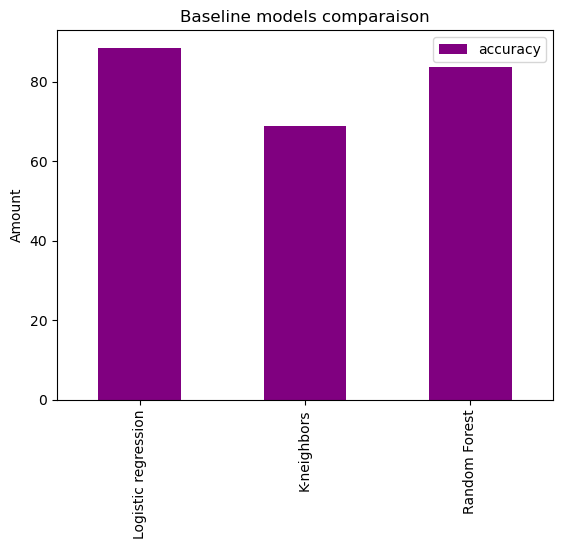

In [81]:
df=pd.DataFrame(models_score,index=["accuracy"])
df.transpose().plot.bar(color="purple")
plt.ylabel("Amount");
plt.title("Baseline models comparaison")
plt.savefig("Baseline models comparaison")

# HyperParameter with RandomizedSearchCV
    

In [18]:
clf=LogisticRegression()
clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'deprecated',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [19]:
clf_2=RandomForestClassifier()
clf_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [20]:
log_reg_par={"C":[0.00000000001,0.01,0.1,10,100],"solver":["liblinear"]}
rand_forr_par={"n_estimators":[10,50,100,200,500,700,1000],
              "max_depth":[None,3,5,7,10],
              "max_features":["auto","sqrt"],
              "min_samples_leaf":[1,3,5,7,10],
              "min_samples_split":[2,3,4,6,10]}

In [21]:
# Tuning Logistic Regression
log_tune=RandomizedSearchCV(clf,log_reg_par,n_iter=5,cv=5,verbose=True)
log_tune.fit(X_train,Y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5,
                   param_distributions={'C': [1e-11, 0.01, 0.1, 10, 100],
                                        'solver': ['liblinear']},
                   verbose=True)

In [22]:
log_tune.best_params_

{'solver': 'liblinear', 'C': 100}

In [23]:
clf_tuned=LogisticRegression(C=100, solver='liblinear')

In [24]:
rand_forr_tune=RandomizedSearchCV(clf_2,rand_forr_par,n_iter=10,cv=5,verbose=True)
rand_forr_tune.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\IA\Machine_Learning\Heart_Disease\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\IA\Machine_Learning\Heart_Disease\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\IA\Machine_Learning\Heart_Disease\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\IA\Machine_Learning\Heart_Disease\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 3, 5, 7, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 3, 5, 7, 10],
                                        'min_samples_split': [2, 3, 4, 6, 10],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         700, 1000]},
                   verbose=True)

In [25]:
clf_2_tune=RandomForestClassifier(max_depth=3, min_samples_leaf=7, min_samples_split=4,
                       n_estimators=50)

In [26]:
# evaluation LogisticRegression
clf_tuned.fit(X_train,Y_train)
clf_tuned.score(X_test,Y_test)

0.8524590163934426

In [27]:
clf_2_tune.fit(X_train,Y_train)
clf_2_tune.score(X_test,Y_test)

0.8688524590163934

In [28]:
models_score

{'Logistic regression': 88.52459016393442,
 'K-neighbors': 68.85245901639344,
 'Random Forest': 83.60655737704919}

# Description

*-- as we notice:
* K_neighbors performance is the worst in comparaison with the others, so i eliminated him.
* I have tuned the RandomForestClassifier and LogisticRegression.
* LogisticRegression_tuned performance was less than the baseline(LogisticRegression)
* RandomForest_tuned performance was Better than the baseline(RandomForest)
* But as we notice the RandomForest_tuned performance is worst than the baseline of LogisticRegression
* So i'am going to eliminate the RandomForest_tuned and i'am going to focus in tuning the LogisticRegression(baseline)

In [29]:
clf_compare={"LogisticRegression":clf,
             "LogisticRegression_tuned":clf_tuned,
            "RandomForest":clf_2,
            "RandomForest_tuned":clf_2_tune,
            "Kneighbors":KNeighborsClassifier()}

In [30]:
clf_plot=fitting(clf_compare,X_train,X_test,Y_train,Y_test)

C:\IA\Machine_Learning\Heart_Disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'tuned models and baseline comparaison')

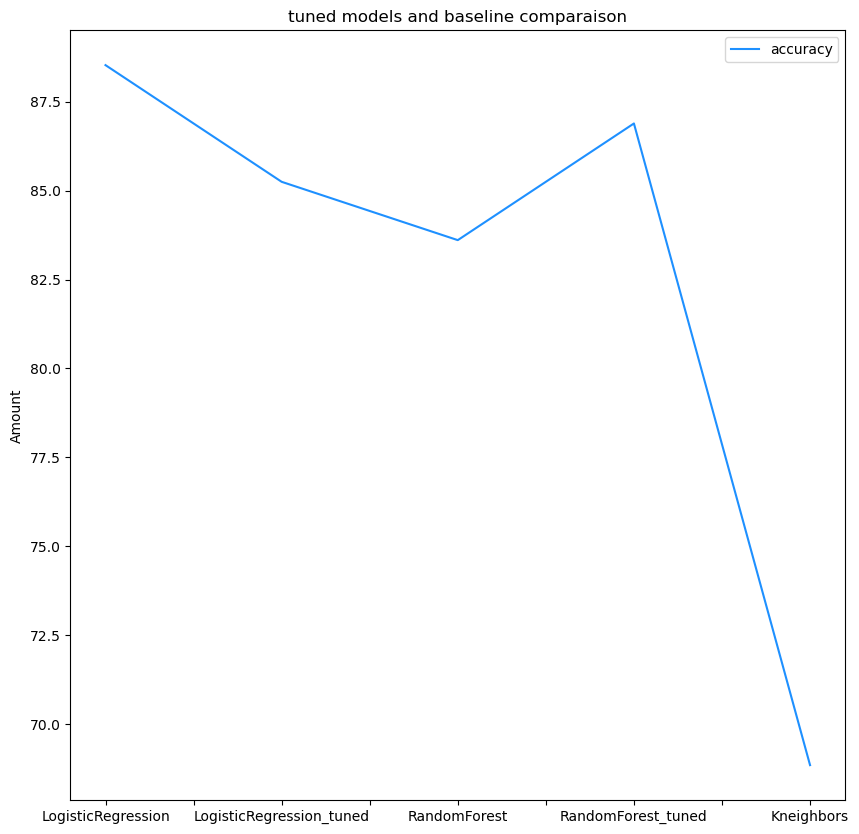

In [82]:
df_clf=pd.DataFrame(clf_plot,index=["accuracy"])
df_clf.transpose().plot(figsize=(10,10),color=("dodgerblue"))
plt.ylabel("Amount");
plt.title("tuned models and baseline comparaison")

# HyperParameter with GridSearchCV

In [32]:
log_reg_par={"C":np.logspace(-4,4,20),"solver":["liblinear"]}
gs_model=GridSearchCV(LogisticRegression(),param_grid=log_reg_par,cv=5,verbose=True)
gs_model.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [33]:
clf_tuned_gs=LogisticRegression(C=0.23357214690901212, solver='liblinear')
clf_tuned_gs.fit(X_train,Y_train)
clf_tuned_gs.score(X_test,Y_test)*100

88.52459016393442

* So we get the same result as the baseline model 

# Evaluation

* Now, I'am going to evaluate the LogisticRegression tuned model   

In [34]:
model=LogisticRegression(C=0.23357214690901212, solver='liblinear')
model.fit(X_train,Y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [35]:
y_pred=model.predict(X_test)

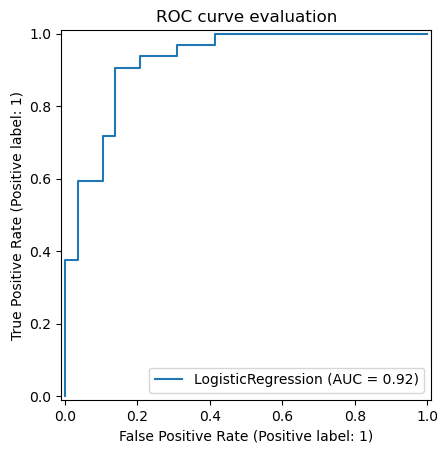

In [84]:
#RocCurveDisplay
RocCurveDisplay.from_estimator(model,X_test,Y_test);
plt.title("ROC curve evaluation")
plt.savefig("ROC eval")

In [37]:
# Confusion Matrix
cfm=confusion_matrix(Y_test,y_pred)

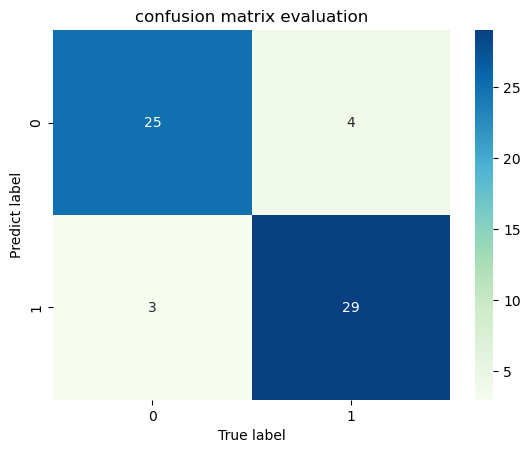

In [85]:
sns.heatmap(cfm,annot=True,cmap="GnBu")
plt.xlabel("True label")
plt.ylabel("Predict label");
plt.title("confusion matrix evaluation")
plt.savefig("Confusion Mat Eval")

In [39]:
#Classification report
classification_report(Y_test,y_pred,output_dict=True)

{'0': {'precision': 0.8928571428571429,
  'recall': 0.8620689655172413,
  'f1-score': 0.8771929824561403,
  'support': 29.0},
 '1': {'precision': 0.8787878787878788,
  'recall': 0.90625,
  'f1-score': 0.8923076923076924,
  'support': 32.0},
 'accuracy': 0.8852459016393442,
 'macro avg': {'precision': 0.8858225108225108,
  'recall': 0.8841594827586207,
  'f1-score': 0.8847503373819163,
  'support': 61.0},
 'weighted avg': {'precision': 0.8854765453126109,
  'recall': 0.8852459016393442,
  'f1-score': 0.8851220105749872,
  'support': 61.0}}

In [40]:
# Cross_validation accuracy
model_lr=LogisticRegression(C=0.23357214690901212, solver='liblinear')
cvs_acc=cross_val_score(model_lr,X,Y,cv=5,scoring="accuracy")

In [42]:
cvs_acc_mean=np.mean(cvs_acc)*100
cvs_acc_mean

84.79781420765026

In [43]:
cvs_prec=cross_val_score(model_lr,X,Y,cv=5,scoring="precision")
cvs_prec_mean=np.mean(cvs_prec)*100
cvs_prec_mean

82.15873015873015

In [44]:
cvs_rec=cross_val_score(model_lr,X,Y,cv=5,scoring="recall")
cvs_rec_mean=np.mean(cvs_rec)*100
cvs_rec_mean

92.72727272727273

In [45]:
cvs_f1=cross_val_score(model_lr,X,Y,cv=5,scoring="f1")
cvs_f1_mean=np.mean(cvs_f1)*100
cvs_f1_mean

87.05403543192143

In [46]:
cvs_eval={"accuracy":cvs_acc_mean,
         "precision":cvs_prec_mean,
         "recall":cvs_rec_mean,
         "f1_score":cvs_f1_mean}

In [47]:
cvs_df=pd.DataFrame(cvs_eval,index=["amount"])

In [48]:
cvs_df

,accuracy,precision,recall,f1_score
amount,84.797814,82.15873,92.727273,87.054035


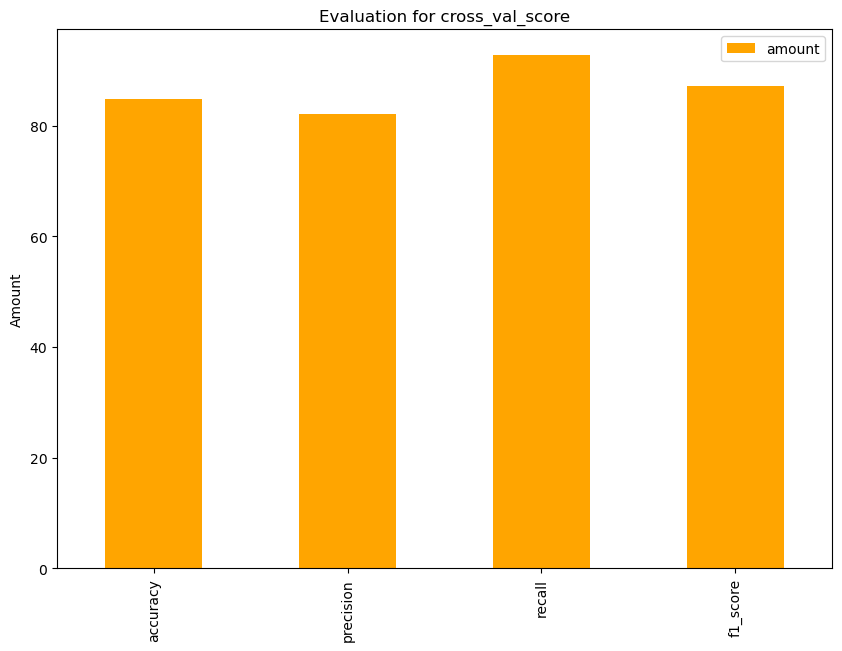

In [88]:
cvs_df.transpose().plot.bar(figsize=(10,7),color="orange")
plt.title("Evaluation for cross_val_score")
plt.ylabel("Amount");
plt.savefig("cross_val_score eval")